In [1]:
import numpy as np
import pandas as pd 
import rasterio
from rasterio.windows import from_bounds
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

In [66]:
img = rasterio.open('/Users/nicolasdemuynck/BeCode/Github/finalchallenge/DHMVIIDSMRAS1m_k13.tif')

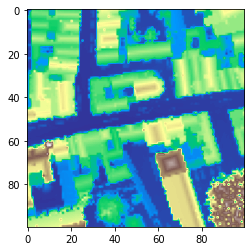

In [67]:
house_lamb_long =  70132.63
house_lamb_lat = 211672.96
left = house_lamb_long - 50
right = house_lamb_long + 50
bottom = house_lamb_lat - 50
top = house_lamb_lat + 50

housemap = img.read(1, window=from_bounds(left, bottom, right, top, img.transform))

rasterio.plot.show (housemap, cmap = 'terrain')

plt.show ()

In [68]:
print(housemap.shape)
print (type(housemap))

(100, 100)
<class 'numpy.ndarray'>


In [69]:
df = pd.DataFrame(housemap)
print(df.shape)
print (type(df))
df.head (5)

(100, 100)
<class 'pandas.core.frame.DataFrame'>


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,8.36,9.06,17.010000,16.950001,16.910000,16.520000,16.980000,16.719999,16.600000,16.660000,...,22.860001,22.709999,22.760000,22.719999,22.340000,21.940001,21.570000,21.170000,20.740000,20.010000
1,8.34,14.54,18.309999,18.240000,18.190001,18.100000,18.070000,18.049999,17.990000,17.990000,...,22.549999,22.600000,22.200001,21.830000,21.459999,21.100000,20.700001,20.320000,19.990000,19.430000
2,8.90,14.81,17.879999,17.980000,17.959999,18.049999,18.110001,18.170000,18.219999,18.389999,...,22.129999,21.719999,21.320000,20.940001,20.549999,20.150000,19.930000,19.320000,19.320000,19.370001
3,13.56,14.56,16.660000,16.639999,16.730000,16.770000,16.820000,16.879999,16.910000,17.709999,...,21.230000,20.809999,21.370001,20.070000,19.420000,20.530001,19.270000,19.290001,19.320000,19.330000
4,12.27,13.33,15.300000,15.400000,15.430000,15.480000,15.560000,15.590000,15.800000,17.080000,...,20.309999,20.049999,19.360001,19.270000,19.280001,19.260000,19.260000,19.290001,19.299999,19.330000


### Extracting the coordinates

In [70]:
#x = np.arange(len(df.columns))
x = df.columns
y = df.index
X,Y = np.meshgrid(x,y)
Z = df

### Matplotlib

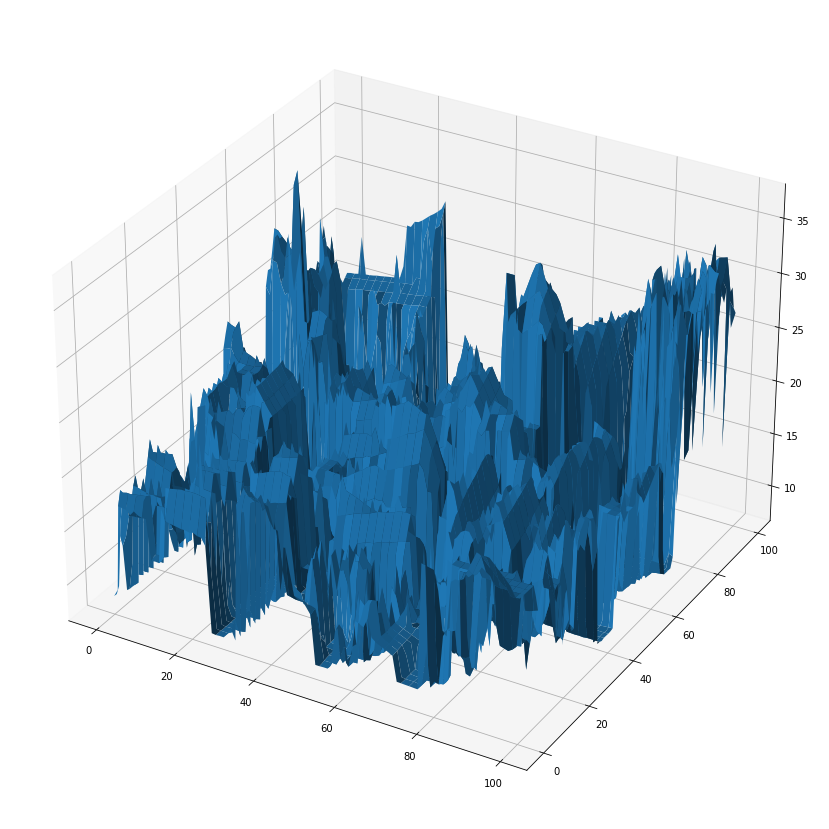

In [71]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

plt.show ()

### Plotly

In [72]:
fig = plt.figure(figsize=(20,15))
fig = go.Figure(data=[go.Surface(z=df.values)])
fig.update_layout(title = 'Brugge', autosize = False, width = 750, height = 750)
fig.show()

<Figure size 1440x1080 with 0 Axes>